In [1]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.text import Text
import matplotlib
import numpy
import pylab

In [2]:
# download folder of txt files from DDL/Url_Text
corp = list(PlaintextCorpusReader('/Users/lisacombs/Desktop/Url_Text/', '.*', encoding='utf8').words()) 

In [3]:
corp.count("Trump")

311

In [4]:
%matplotlib inline

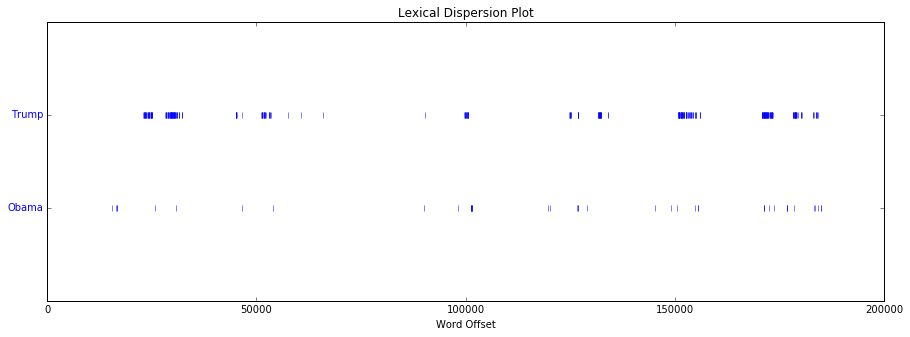

In [5]:
pylab.rcParams['figure.figsize'] = (15, 5)
Text(corp).dispersion_plot(['Trump', 'Obama']) # test

In [6]:
corp_norm = [word.lower() for word in corp if word.isalpha()] # normalize, find words and make them lowercase
corp_norm = [word for word in corp_norm if len(word) > 1] # also remove any words only used once

In [7]:
# remove stopwords, could move this step up
stop_words = set(nltk.corpus.stopwords.words('english'))

# we can add custom stopwords - caption, copyright, said/say, image?
custom_stopwords = set(('caption', 'image', 'copyright', 'said'))
stop_words = stop_words | custom_stopwords

corp_norm = [word for word in corp_norm if word not in stop_words]

In [8]:
# stem - select best later 

In [9]:
porter = nltk.PorterStemmer()
corp_norm = [str(porter.stem(word)) for word in corp_norm]

In [10]:
# frequency distribution, find the most common words in the normalized text 

In [11]:
corp_fd = nltk.FreqDist(corp_norm)
corp_fd.most_common(10) 

[('year', 462),
 ('one', 433),
 ('say', 417),
 ('state', 398),
 ('trump', 348),
 ('like', 338),
 ('would', 323),
 ('also', 319),
 ('tuesday', 305),
 ('time', 300)]

In [12]:
corp_fd.tabulate(14)

   year     one     say   state   trump    like   would    also tuesday    time   peopl     new     two    work 
    462     433     417     398     348     338     323     319     305     300     299     268     254     248 


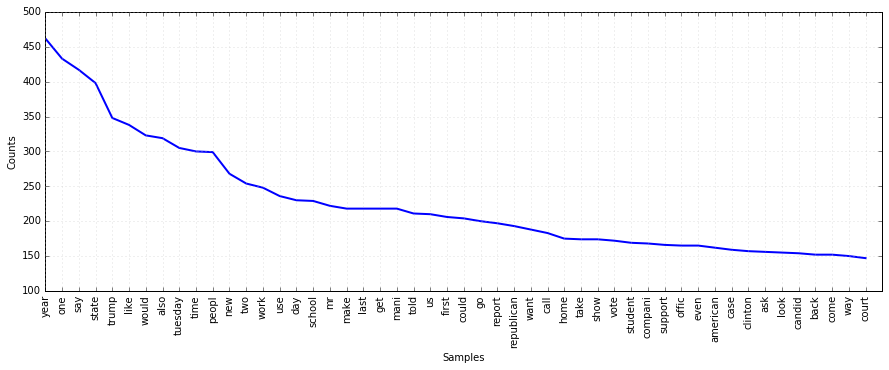

In [13]:
pylab.rcParams['figure.figsize'] = (15, 5)
corp_fd.plot(50)

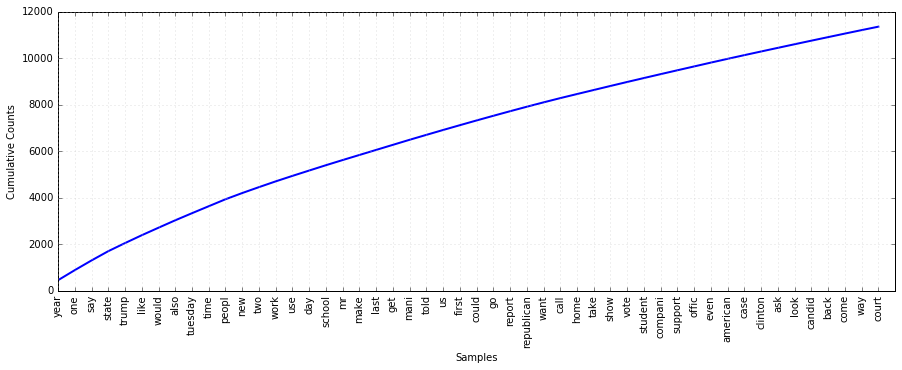

In [14]:
pylab.rcParams['figure.figsize'] = (15, 5)
corp_fd.plot(50, cumulative = True)

In [15]:
corp_100 = corp_fd.most_common(100) # 100 is an arbitrary number, we can change it

# can group them by txt file or topic/source?

In [16]:
# get just the words to use for later
corp_100_words = [word[0] for word in corp_100] 

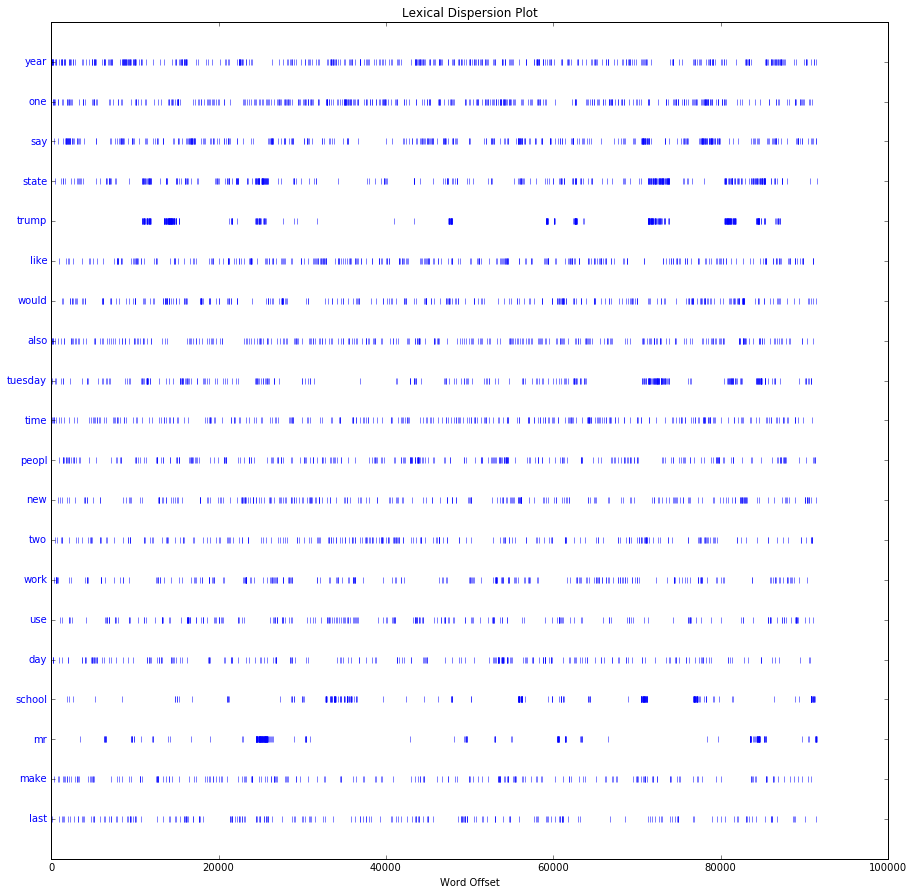

In [17]:
pylab.rcParams['figure.figsize'] = (15, 15)
nltk.draw.dispersion_plot(text = corp_norm, words = corp_100_words[:20]) # do with with conditional freq dist

In [18]:
# tag - try to identify certain nouns that should go together - i.e. bin laden
# do this with unnormalized text?

corp_tag = nltk.pos_tag(corp)

sequence = '''
            Chunk:
            {<NNPS>+}
            {<NNP>+}
            {<NN>+}
            '''

chunker = nltk.RegexpParser(sequence)
result = chunker.parse(corp_tag)
result[:10]

[Tree('Chunk', [('Osama', 'NNP'), ('Bin', 'NNP'), ('Laden', 'NNP')]),
 ("'", 'POS'),
 Tree('Chunk', [('s', 'NN')]),
 Tree('Chunk', [('Will', 'NNP')]),
 (':', ':'),
 ('$', '$'),
 ('29', 'CD'),
 Tree('Chunk', [('Million', 'NNP')]),
 ('That', 'DT'),
 Tree('Chunk', [('Should', 'NNP'), ('Be', 'NNP'), ('Spent', 'NNP')])]

In [19]:
# try name entity:
corp_chunk = nltk.ne_chunk(corp_tag)
corp_chunk[:10]

[Tree('PERSON', [('Osama', 'NNP')]),
 Tree('PERSON', [('Bin', 'NNP'), ('Laden', 'NNP')]),
 ("'", 'POS'),
 ('s', 'NN'),
 Tree('PERSON', [('Will', 'NNP')]),
 (':', ':'),
 ('$', '$'),
 ('29', 'CD'),
 ('Million', 'NNP'),
 ('That', 'DT')]

In [20]:
for chunk in corp_chunk:
    if hasattr(chunk, 'label'):
        print(chunk.label(), " ".join(c[0] for c in chunk.leaves()))

PERSON Osama
PERSON Bin Laden
PERSON Will
PERSON Should Be Spent
PERSON Jihad
PERSON Rahimullah Yousafzai
ORGANIZATION AP Rahimullah
ORGANIZATION AP
PERSON Osama
PERSON Laden
PERSON Jihad
ORGANIZATION National Intelligence
PERSON Navy SEALs
GPE Qaida
GPE Abbottabad
GPE Pakistan
PERSON Laden
GPE Sudan
GPE Sudan
GPE Afghanistan
ORGANIZATION Taliban
GPE Sudan
GPE Jihad
PERSON Allah
PERSON Laden
PERSON Media
PERSON Laden
GPE Sudan
ORGANIZATION Afghan
GPE Jalalabad
GPE Kandahar
PERSON Laden
GPE Qaida
PERSON Senior U
PERSON Laden
PERSON Bin Laden
GPE Saudi Arabia
GPE Hands
ORGANIZATION Leader Most
PERSON Laden
GPE Qaida
PERSON Laden
GPE Qaida
GPE America
GPE Iran
GPE Qaida
GPE Iran
GPE Pakistan
PERSON Tehran
GPE Waziristan
GPE Pakistan
PERSON Laden
PERSON Khairah
GPE Iran
GPE Iran
PERSON Laden
GPE Shabab
ORGANIZATION Islamist
GPE Somalia
GPE French
GPE French
PERSON Nicolas Sarkozy
GPE French
PERSON Michael Dell
ORGANIZATION EMC Corp
PERSON Dell
ORGANIZATION Dell
ORGANIZATION EMC
GPE United 

In [21]:
# further work:
# try with sentences to make tree, could possibly link
# http://stackoverflow.com/questions/31936026/drawing-a-flatten-nltk-parse-tree-with-np-chunks

In [22]:
# more:
# bigrams
# word length distrbution